In [50]:
import pandas as pd
import numpy as np
import datatable as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mtp

pd.set_option('display.max_columns', 500)

In [51]:

df_train = dt.fread("../data/raw/training_sample.csv").to_pandas()
df_test = dt.fread("../data/raw/testing_sample.csv").to_pandas()

In [52]:
df_train.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,86a8-6b735c67-86a8-407b-ba24-333055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
3,6a3d-6b736346-6a3d-4085-934b-396834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
4,b74a-6b737717-b74a-45c3-8c6a-421140,False,True,False,True,False,False,False,False,True,False,True,False,True,True,False,False,False,True,False,False,True,False,True,True


In [53]:
df_train.describe().T

,count,unique,top,freq
UserID,455401,455401,a720-6b732349-a720-4862-bd21-644732,1
basket_icon_click,455401,2,False,410248
basket_add_list,455401,2,False,421464
basket_add_detail,455401,2,False,403979
sort_by,455401,2,False,438620
image_picker,455401,2,False,443226
account_page_click,455401,2,False,453775
promo_banner_click,455401,2,False,448020
detail_wishlist_add,455401,2,False,453802
list_size_dropdown,455401,2,False,350494


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  bool  
 2   basket_add_list          455401 non-null  bool  
 3   basket_add_detail        455401 non-null  bool  
 4   sort_by                  455401 non-null  bool  
 5   image_picker             455401 non-null  bool  
 6   account_page_click       455401 non-null  bool  
 7   promo_banner_click       455401 non-null  bool  
 8   detail_wishlist_add      455401 non-null  bool  
 9   list_size_dropdown       455401 non-null  bool  
 10  closed_minibasket_click  455401 non-null  bool  
 11  checked_delivery_detail  455401 non-null  bool  
 12  checked_returns_detail   455401 non-null  bool  
 13  sign_in                  455401 non-null  bool  
 14  saw_checkout        

In [55]:
df_train.isna().sum().sum()

0

In [56]:
df_train.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [60]:
df_train_noid = df_train.drop("UserID",axis=1)
df_test_noid = df_test.drop("UserID",axis=1)

In [61]:
df_train_noid.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
4,False,True,False,True,False,False,False,False,True,False,True,False,True,True,False,False,False,True,False,False,True,False,True,True


In [62]:
df_train_noid = (df_train_noid*1).astype(int)
df_test_noid = (df_train_noid*1).astype(int)

In [63]:
df_train_noid.describe().T

,count,mean,std,min,25%,50%,75%,max
basket_icon_click,455401.0,0.099150,0.298864,0.0,0.0,0.0,0.0,1.0
basket_add_list,455401.0,0.074521,0.262617,0.0,0.0,0.0,0.0,1.0
basket_add_detail,455401.0,0.112916,0.316490,0.0,0.0,0.0,0.0,1.0
sort_by,455401.0,0.036849,0.188391,0.0,0.0,0.0,0.0,1.0
image_picker,455401.0,0.026735,0.161307,0.0,0.0,0.0,0.0,1.0
account_page_click,455401.0,0.003570,0.059647,0.0,0.0,0.0,0.0,1.0
promo_banner_click,455401.0,0.016208,0.126274,0.0,0.0,0.0,0.0,1.0
detail_wishlist_add,455401.0,0.003511,0.059151,0.0,0.0,0.0,0.0,1.0
list_size_dropdown,455401.0,0.230362,0.421065,0.0,0.0,0.0,0.0,1.0
closed_minibasket_click,455401.0,0.017277,0.130302,0.0,0.0,0.0,0.0,1.0


### Dataframe not balanced

In [64]:
df_train_noid['mean'],df_test_noid['mean'] = df_train_noid.mean(numeric_only=True, axis=1),df_test_noid.mean(numeric_only=True, axis=1)

In [65]:
df_train_noid.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,mean
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.125000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.083333
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.125000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.125000
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0.416667


## Visual exploration

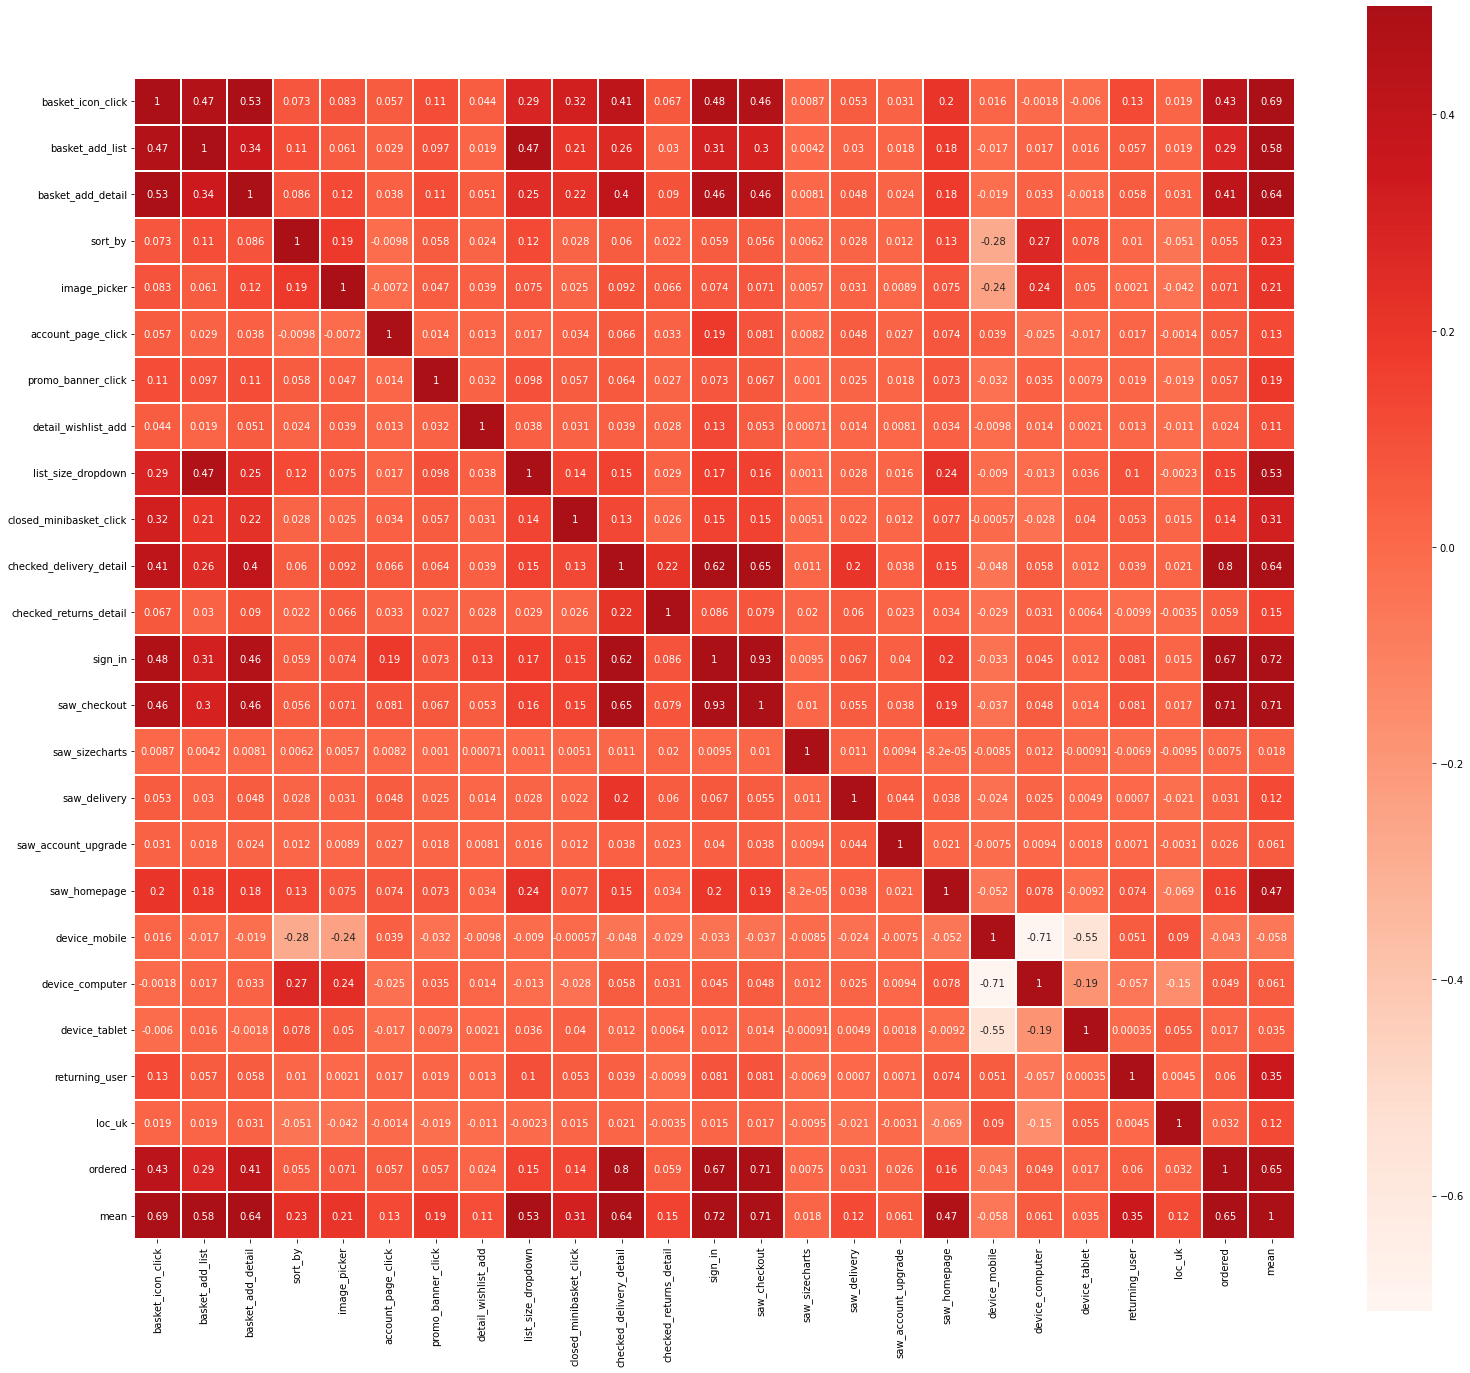

In [66]:
corr = df_train_noid.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26, 24))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Reds',annot=True)
plt.savefig("heatmap.png")
plt.show()

## We have a negative correlation between "ordered" and "mobile"

In [67]:
df_train_noid.corr()['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
mean                       0.651670
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

In [70]:
df_test_noid.head()
ids = df_test.UserID

In [71]:
pd.DataFrame(ids)

,UserID
0,9d24-25k4-47889d24-25k4-494b-398124
1,7732-1k58-47887732-1k58-4475-679678
2,94k2-632j-471394k2-632j-4b4j-228160
3,jdd8-419d-4714jdd8-419d-4198-674376
4,7473-7595-47147473-7595-4757-227547
...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471
151651,d427-5450-0j15d427-5450-4661-370635
151652,8869-1022-0j168869-1022-4490-699568
151653,5893-2228-0j165893-2228-4kb7-871348


In [72]:
df_train_noid.to_csv("../data/processed/df_train_pp.csv"), df_test_noid.to_csv("../data/processed/df_test_pp.csv"), ids.to_csv("../data/processed/ids.csv")

(None, None, None)